# Simple Linear Regression
Regression is a very general way of trying to determine the relationship between different variables. The classical example of this, and the example that we are going to start with, is the simple linear regression, where the dependent variable is related linearly to the independent variable. These models take the form $y = B_0 + B_1x$ where $y$ is the independent variable and $x$ is the dependent variable. Our coefficients are intepreted as follows: $B_0$ is the value of the dependent variable when our independent variable is equal to 0 and $B_1$ is the change in the dependent variable with a unit change in the independent variable. Let us go ahead and look at this with some data. For this example we are going to see how the years of experience relates to the salary of employees. First let us go ahead and import the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

# See the dataset
print(dataset)

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


Now we can plot our data to get a better idea of what we have.

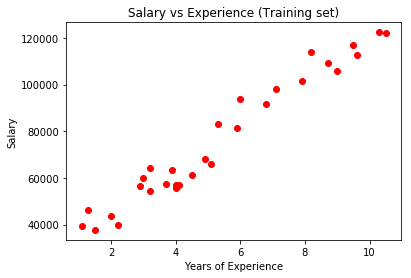

In [2]:
plt.scatter(X, y, color = 'red')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

The idea is that we want to fix a line that "best fits" the data. By best fit, we mean we want to minimize the distance between our data points and the line. More formally, if $y_i$ is the actual value of $y$ for some $x_i$ in our data set, and $\hat{y_i}$ is the value of $y$ predicted by our line for $x_i$, then we want the smallest possible distance squared (to avoid having to worry about sign) over all $x_i$. Namely, if we have $n$ observations for $x$, we want $\sum_{i=1}^{n})(y_i-\hat{y_i})^2$ to be as small as possible. We note that $\hat{y_i}=\hat{B_0} + \hat{B_1}*x$ and we can take the partial derivatives with respect to $\hat{B_0}$ and $\hat{B_1}$ to find out solution. Or, we can let python do it for us.

C:\Users\Student\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


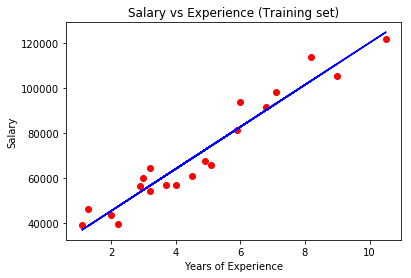

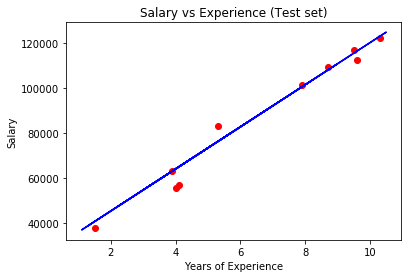

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

We can see that in our second graph, our predicted line is pretty close to the previously unseen values of the dataset, which is good nears for our model. This means that are model is able to generalize to the that it has not seen before.

# Multiple Linear Regression

A logical extension of this idea is the idea of multiple linear regression. As one would guess, this is just linear regression except now there are multiple independent variables to deal with. A brief aside about linear regression before we begin. Any linear regression model makes various assumptions about the data. Since this is machine learning and not a course on linear regression, we will largely not concern ourselves with these assumptions other than knowing that they exist. There are five assumptions that we will now introduce:
1. There exists a linear relationship between the independent and dependent variables. If we don't have a linear relationship to begin with, then a linear model is a poor choice.
2. All variables are normally distributed. Violation of this assumption means we may need to transform our data.
3. No multicollinearity. Multicollinearity occurs when independent variables are not independent from one another.
4. Homoscedasticity. The variance of the error terms (or residuals) across all variables should be roughly the same.
5. Independence of residuals: The residuals, or error terms, should be independent from one another.
We should be aware that these assumptions exists but this is not the focus at the moment. 

Now we move on to the ways of building multiple linear regression (MLR) models. If we are given a dataset with a bunch of features, our goals is to build a linear model where we include only variables that actually contribute to the model, we should not just include all features because we want the simplest model that explains the response. There are a couple of ways to do this. Again, the gears behind this belong in a statistics or linear regression class, but we will go over the intuition. There are a couple of options we can choose to build the model:
1. Forward selection: start with no variables. Add the most significant variable (by whatever metric of significant we are using). The next variable we should add is the variable that is most significant *given the presence of the first variable*. We continue to add variables until no new variable is significant given the presence of the other variables.
2. Backward selection: start with all variables. Remove the variable that is least significant given the presence of the other variables. Continue to remove the least significant variable until no variable is insignificant given the presence of the other variables. 
3. Bidirectional: A mixture of both previous methods.
4. All: make all possible models and see which fits all criterion the best.
With all of these methods, it is possible to add in prior knowledge about the data to make more intelligent decisions.

The code for python is actually identical, we just have multiple variables for our independent set.

In [5]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# Avoiding the Dummy Variable Trap
X = X[:, 1:]

# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Building the optimal model using Backward Elimination
import statsmodels.formula.api as sm
X = np.append(arr = np.ones((50, 1)).astype(int), values = X, axis = 1)
X_opt = X[:, [0, 1, 2, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 1, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3, 4, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3, 5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
X_opt = X[:, [0, 3]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 26 May 2017   Prob (F-statistic):           3.50e-32
Time:                        19:52:39   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000      4.39e+04  5.41e+04
x1             0.8543      0.029     29.151      0.000         0.795     0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This output is the final output from our backward elimination model. We see all significant p-values. If we saw earlier output, we would see that at each step, there would have been an insignificant p-value, which was then removed.

# Polynomial Regression

We are certainly not limited to just lines. Regression can in fact extend to a number of functional shapes. For now, let us turn our attention to polynomial regression. Polynomial regression will take the form $y = b_0 + b_1x + b_2x^2 + .... + b_nx^n$. Aside from a few syntactic differences, which should be easy to follow in the code below. Effectively, the same thing is done as linear regression, except we specify the degree of the polynomial we want fitted (simple linear regression is a special case of polynomial regression when degree is 1). Our data is the the salary vs. the level of the position within a given company. Let us read in the data and plot it to get an idea of what we are dealing with.

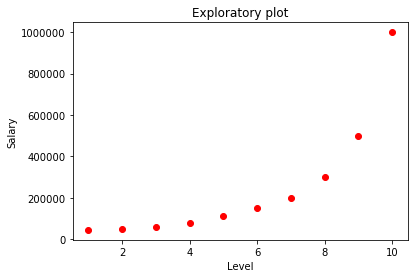

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

plt.scatter(X, y, color='red')
plt.title("Exploratory plot")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

From plotting this data, it should be clear that we do not have a simply linear regression. The data seems to follow a higher level polynomial, meaning we need to implement polynomial regression. To see why a linear regression model inappropriate, we will build a simple linear model on top of other models to see how much better the higher level models fit.

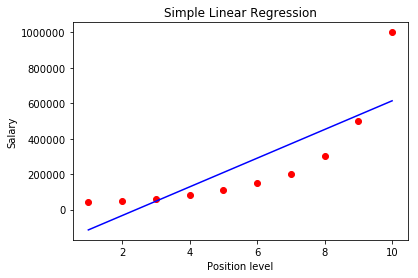

In [3]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Simple Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

It should be easy to see that this line is no a very good fit. Let us now create our higher degree polynomial object. To do this, we first need to transform our data features to add the polynomial terms to our data. For example, if we want to fit a degree 2 polynomial, then we first transform our data to add an $x^2$ feature, and then we can just fit a multiple linear regression model to our transformed data. Looking at the data, we might think that a degree 2 model will be best, so this model is fitted below.

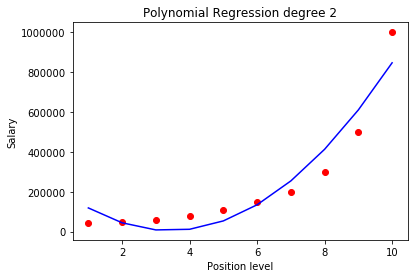

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression degree 2')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


This fit is decent, but we can do better, we will now try a degree 4.

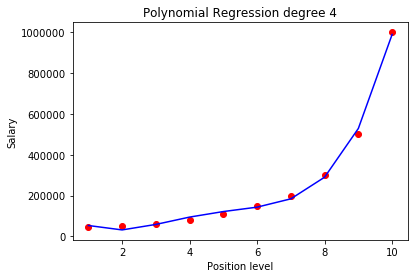

In [7]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Polynomial Regression degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

This fit is good but the graph does not look great. Doing a little bit of syntactic magic, we can make the graph look a little bit smoother.

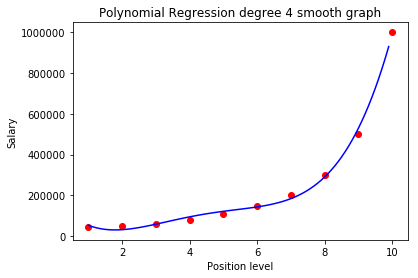

In [8]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Polynomial Regression degree 4 smooth graph')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()